In [4]:
from sklearn.datasets import load_iris
irisData=load_iris()

In [16]:
#checking columns in the datasets
print(f"Values in Datasets {irisData.keys()}")
#checking the size of data
print(f"The size of the data is : {irisData['data'].shape} entries and columns")

Values in Datasets dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
The size of the data is : (150, 4) entries and columns


In [17]:
#checking first five smaple data
print(f"sample data :\n {irisData['data'][:5]}")

sample data :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [19]:
#splitting the dataset into training and testing data
#we split it as f(X)=y format where X is data to test and y is label outcome
#using inbuilt scikit-learn function to split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(irisData['data'],irisData['target'],random_state=0)
print(f"X training data : {X_train.shape}")
print(f"X test data     : {X_test.shape}")

X training data : (112, 4)
X test data     : (38, 4)


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

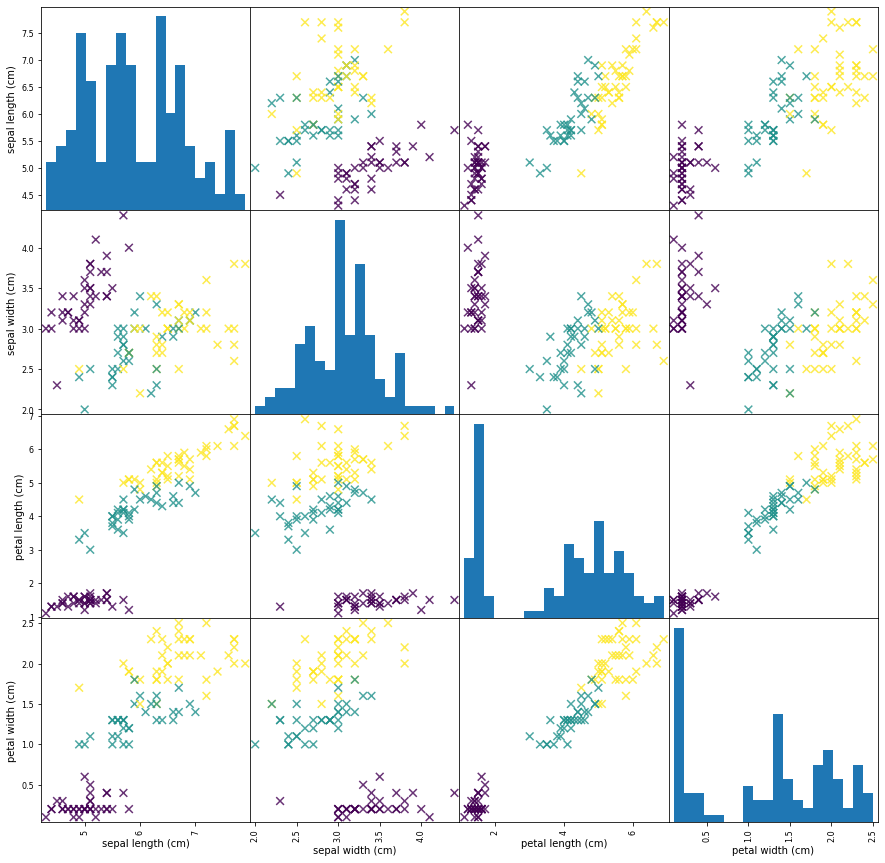

In [28]:
#we need to understand our data so plot the data 
# effective way of plotting multiple features together is using pair plot
import pandas as pd

irisDataFrame=pd.DataFrame(X_train,columns=irisData.feature_names)
#print(irisDataFrame)
#printing the frame
pd.plotting.scatter_matrix(irisDataFrame,c=y_train,figsize=(15,15),marker='x',hist_kwds={'bins':20},s=60,alpha=0.8)

In [31]:
#building model using K-nearest neighbour
'''
K nearest neighbour is a supervised classification algorithm which is widely used for a lot of ML applications.
The classifier saves the training dataset and inorder to make the prediction it simply find a point to which the
testing data is closest to.Then it assigns the label to the new data which falls into the closest class.

All ML models in sklearn have their own classes called "Estimator" classes.
The K-nearest neighbours is implemented via KNeighboursClassifier in the neighbours submodule

K in KNN represents the number of neigbours surrounding the new data point which are used to compare with the new data point
'''
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [33]:
#feeding the instace to our knn
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
#making new predictions
import numpy as np
X_new=np.array([[5, 2.9, 1, 0.2]])
print(f"X_new is : {X_new.shape}")

X_new is : (1, 4)


In [38]:
#making prediction with our knn
prediction=knn.predict(X_new)
print(f"Prediction : {prediction}\nPredicted value : {irisData['target_names'][prediction]}")

Prediction : [0]
Predicted value : ['setosa']


In [47]:
#Evaluating the model
#let's predict our test data
y_pred=knn.predict(X_test)
#checking the mean values predicted by comparing to real values
print(f"Score using numpy  : {round(np.mean(y_pred==y_test),2)}")
print(f"Score using KNN score : {round(knn.score(X_test,y_test),2)}")
print(f"This means that {round(np.mean(y_pred==y_test),2)*100 } % of our classifications for the test data were predicted truly")

Score using numpy  : 0.97
Score using KNN score : 0.97
This means that 97.0 % of our classifications for the test data were predicted truly
